2025-07-20 06:12:25.990 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 06:12:26.121 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-20 06:12:26.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 06:12:26.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 06:12:26.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 06:12:26.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 06:12:26.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 06:12:26.128 Thread 'MainThread': mi

DeltaGenerator()

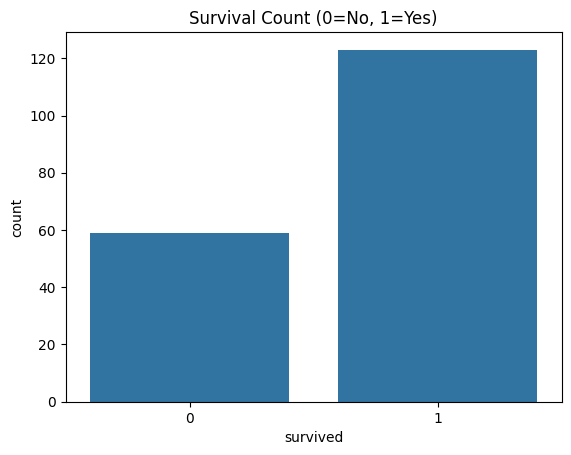

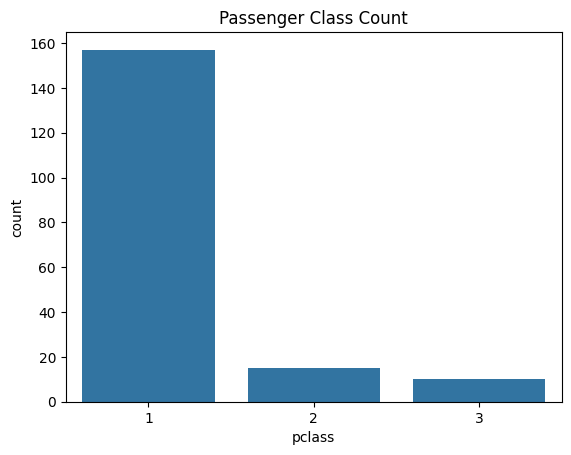

In [3]:
# Step 1: Install Streamlit
# Run this in terminal or notebook:
# !pip install streamlit seaborn pandas matplotlib

# Save this code in a file called: app.py

import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
titanic = sns.load_dataset('titanic')
titanic.dropna(inplace=True)

# Dashboard Title
st.title('Titanic Survival Dashboard 🚢')
st.write("Interactive dashboard to explore Titanic passenger survival.")

# Sidebar Filters
st.sidebar.header('Filter Data')
gender = st.sidebar.multiselect('Select Gender', options=titanic['sex'].unique(), default=titanic['sex'].unique())
pclass = st.sidebar.multiselect('Select Class', options=titanic['pclass'].unique(), default=titanic['pclass'].unique())

# Apply Filters
filtered_data = titanic[(titanic['sex'].isin(gender)) & (titanic['pclass'].isin(pclass))]

# Show Filtered Data
st.subheader('Filtered Dataset')
st.dataframe(filtered_data)

# Metrics
survived_count = filtered_data['survived'].sum()
total_count = len(filtered_data)
survival_rate = round((survived_count / total_count) * 100, 2)

st.metric("Total Passengers", total_count)
st.metric("Survived", survived_count)
st.metric("Survival Rate (%)", survival_rate)

# Survival Plot
st.subheader('Survival Count Plot')
fig, ax = plt.subplots()
sns.countplot(x='survived', data=filtered_data, ax=ax)
ax.set_title('Survival Count (0=No, 1=Yes)')
st.pyplot(fig)

# Class Distribution
st.subheader('Passenger Class Distribution')
fig2, ax2 = plt.subplots()
sns.countplot(x='pclass', data=filtered_data, ax=ax2)
ax2.set_title('Passenger Class Count')
st.pyplot(fig2)
